In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Reading the dataset
kidney = pd.read_csv("../input/kidney_disease.csv")
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# To see what are the column names in our dataset
print(kidney.columns)

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [4]:
# Mapping the text to 1/0 and cleaning the dataset 
kidney[['htn','dm','cad','pe','ane']] = kidney[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney[['rbc','pc']] = kidney[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney[['pcc','ba']] = kidney[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
kidney[['appet']] = kidney[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
kidney['classification'] = kidney['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
kidney.rename(columns={'classification':'class'},inplace=True)

kidney['pe'] = kidney['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
kidney['appet'] = kidney['appet'].replace(to_replace='no',value=0)
kidney['cad'] = kidney['cad'].replace(to_replace='\tno',value=0)
kidney['dm'] = kidney['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
kidney.drop('id',axis=1,inplace=True)

In [5]:
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [6]:
# This helps us to count how many NaN are there in each column
len(kidney)-kidney.count()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [7]:
# This shows number of rows with missing data
kidney.isnull().sum(axis = 1)

0       3
1       5
2       3
3       0
4       2
5       2
6       3
7       3
8       2
9       0
10      5
11      0
12      1
13      8
14      0
15      1
16      4
17      8
18      1
19      3
20      0
21      7
22      0
23     10
24      1
25      1
26      1
27      0
28      9
29      5
       ..
370     0
371     0
372     0
373     0
374     0
375     0
376     0
377     0
378     2
379     0
380     0
381     2
382     0
383     0
384     0
385     0
386     0
387     0
388     0
389     0
390     0
391     0
392     0
393     0
394     0
395     0
396     0
397     0
398     0
399     0
Length: 400, dtype: int64

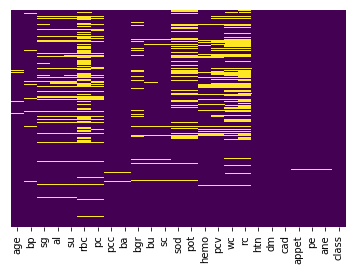

In [8]:
#This is a visualization of missing data in the dataset
sns.heatmap(kidney.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# This shows number of complete cases and also removes all the rows with NaN
kidney2 = kidney.dropna()
print(kidney2.shape)

(158, 25)


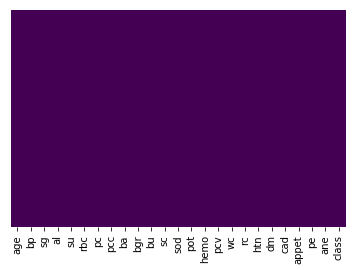

In [10]:
# Now our dataset is clean
sns.heatmap(kidney2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

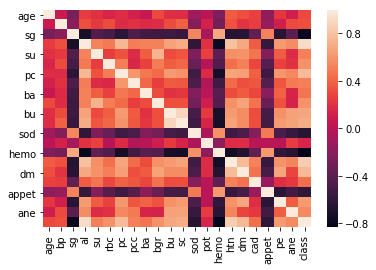

In [11]:
sns.heatmap(kidney2.corr())

AxesSubplot(0.125,0.125;0.775x0.755)


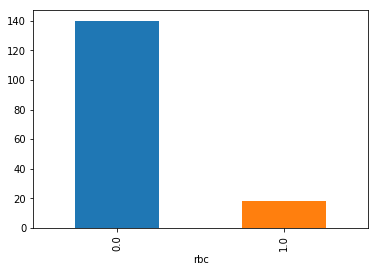

In [12]:
# Counting number of normal vs. abnormal red blood cells of people having chronic kidney disease
print(kidney2.groupby('rbc').rbc.count().plot(kind="bar"))

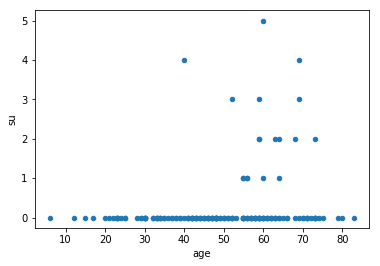

In [13]:
#This plot shows the patient's sugar level compared to their ages
kidney2.plot(kind='scatter', x='age',y='su');
plt.show()

In [14]:
# Shows the maximum blood pressure having chronic kidney disease
print(kidney2.groupby('class').bp.max())

class
0.0     80.0
1.0    110.0
Name: bp, dtype: float64


In [15]:
print(kidney2['dm'].value_counts(dropna=False))

0.0    130
1.0     28
Name: dm, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(kidney2.iloc[:,:-1], kidney2['class'], test_size=0.2, random_state=42, stratify= kidney2['class'])

In [17]:
print(X_train.shape)

(126, 24)


In [18]:
y_train.value_counts()

0.0    92
1.0    34
Name: class, dtype: int64

In [19]:
rfc = RandomForestClassifier(random_state = 22)
rfc_fit = rfc.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
rfc_pred = rfc_fit.predict(X_test)

In [21]:
print(confusion_matrix(y_test,rfc_pred))

[[23  0]
 [ 0  9]]


In [22]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [23]:
accuracy_score( y_test, rfc_pred)

1.0

# Saving the best model RFC

In [24]:
import pickle

#Save model
filename = 'rfc.pkl'
pickle.dump(rfc_fit, open(filename, 'wb'))

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [27]:
pred = knn.predict(X_test)

In [28]:
print(confusion_matrix(y_test,pred))

[[23  0]
 [ 3  6]]


# Saving KNN model

In [29]:
#Save model
filename = 'knn.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        23
         1.0       1.00      0.67      0.80         9

    accuracy                           0.91        32
   macro avg       0.94      0.83      0.87        32
weighted avg       0.92      0.91      0.90        32



In [31]:
accuracy_score( y_test,pred)

0.90625

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Saving Log Model

In [33]:
#Save model
filename = 'logmodel.pkl'
pickle.dump(logmodel, open(filename, 'wb'))

In [34]:
predictions = logmodel.predict(X_test)

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [36]:
print(confusion_matrix(y_test,predictions))

[[23  0]
 [ 0  9]]


In [37]:
accuracy_score( y_test, predictions)

1.0

In [38]:
feature_importances = pd.DataFrame(rfc.fit(X_train,y_train).feature_importances_, index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

       importance
sg       0.240641
rc       0.161014
al       0.138740
sc       0.100000
hemo     0.091223
pc       0.069757
bgr      0.061290
pcv      0.057021
sod      0.055825
ane      0.013034
bp       0.007609
bu       0.003846
ba       0.000000
pot      0.000000
pcc      0.000000
rbc      0.000000
wc       0.000000
su       0.000000
htn      0.000000
dm       0.000000
cad      0.000000
appet    0.000000
pe       0.000000
age      0.000000


In [39]:
kidney3 = kidney.drop(columns=['rbc', 'pc', 'sod', 'pot', 'pcv', 'wc', 'rc'])
kidney3. shape

(400, 18)

In [40]:
kidney3.head()

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,121.0,36.0,1.2,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,NaN,18.0,0.8,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,423.0,53.0,1.8,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,117.0,56.0,3.8,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,106.0,26.0,1.4,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [41]:
kidney3.isnull().sum()

age       9
bp       12
sg       47
al       46
su       49
pcc       4
ba        4
bgr      44
bu       19
sc       17
hemo     52
htn       2
dm        2
cad       2
appet     1
pe        1
ane       1
class     0
dtype: int64

In [42]:
kidney3.mode()

,age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
0,60.0,80.0,1.02,0.0,0.0,0.0,0.0,99.0,46.0,1.2,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [43]:
# Fill in the NaNs with the mode for each column.   
kidney3_imp = kidney3.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [44]:
kidney3_imp.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
hemo     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(kidney3_imp.iloc[:,:-1], kidney3_imp['class'],
                                                    test_size = 0.2, random_state=44,
                                                   stratify = kidney3_imp['class'])

In [46]:
y_train.value_counts()

1.0    200
0.0    120
Name: class, dtype: int64

In [47]:
rfc = RandomForestClassifier(random_state = 22)
rfc_fit = rfc.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
rfc_pred = rfc_fit.predict(X_test)

# Saving New RFC Model

In [49]:
#Save model
filename = 'rfc_fit_new.pkl'
pickle.dump(rfc_fit, open(filename, 'wb'))

In [50]:
print(confusion_matrix(y_test,rfc_pred))

[[30  0]
 [ 0 50]]


In [51]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [52]:
accuracy_score( y_test, rfc_pred)

1.0

In [53]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Saving new Log Model

In [54]:
#Save model
filename = 'logmodel_new.pkl'
pickle.dump(logmodel, open(filename, 'wb'))

In [55]:
predictions = logmodel.predict(X_test)

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        30
         1.0       0.98      1.00      0.99        50

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [57]:
print(confusion_matrix(y_test,predictions))

[[29  1]
 [ 0 50]]


In [58]:
accuracy_score( y_test, rfc_pred)

1.0

In [59]:
dtree=DecisionTreeClassifier()

In [60]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Saving New decision tree model

In [61]:
#Save model
filename = 'dtree.pkl'
pickle.dump(dtree, open(filename, 'wb'))

In [62]:
predictions=dtree.predict(X_test)

In [63]:
print(confusion_matrix(y_test,predictions))

[[30  0]
 [ 0 50]]


In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [65]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'

features = list(kidney3.columns[1:])
features

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['bp',
 'sg',
 'al',
 'su',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'hemo',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

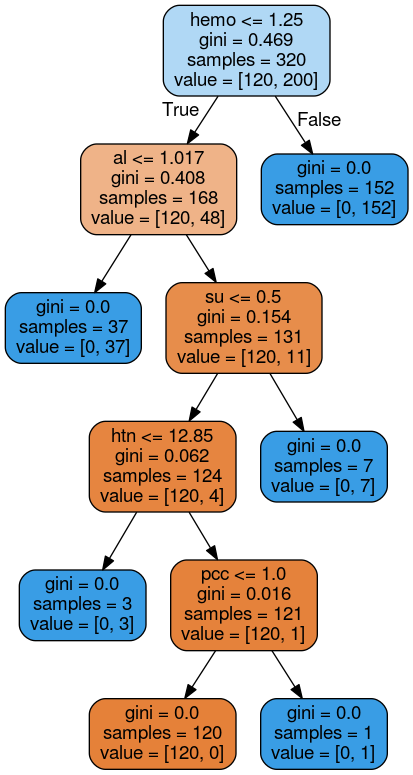

In [66]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data,feature_names = features,filled = True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [67]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
rfc_pred = rfc.predict(X_test)

In [69]:
#Save model
filename = 'rfc_high.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [70]:
print(confusion_matrix(y_test,rfc_pred))

[[30  0]
 [ 0 50]]


In [71]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [72]:
accuracy_score( y_test, rfc_pred)

1.0

In [73]:
# Choosing a K Value.
# Let's go ahead and use the elbow method to pick a good k value.
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

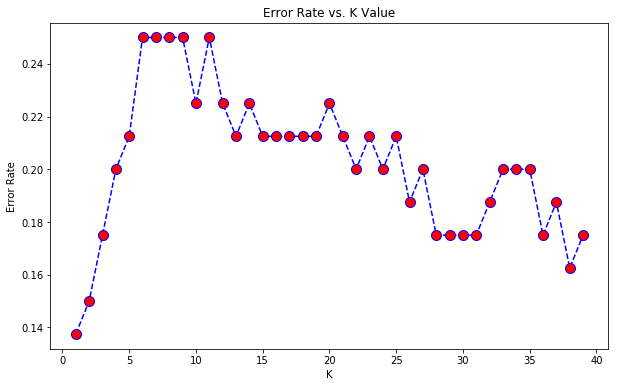

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [75]:
knn = KNeighborsClassifier(n_neighbors=1)

In [76]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [77]:
pred = knn.predict(X_test)

# Saving Lowest KNN model

In [78]:
#Save model
filename = 'knn_lowest.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [79]:
print(confusion_matrix(y_test,pred))

[[26  4]
 [ 7 43]]


In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83        30
         1.0       0.91      0.86      0.89        50

    accuracy                           0.86        80
   macro avg       0.85      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80



In [81]:
accuracy_score( y_test,pred)

0.8625